# TASK 6.4 SUPERVISED MACHINE LEARNING

**THIS SCRIPT CONTAINS THE FOLLOWING SECTIONS:**
    
    1. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
    
    2. Clean your data so that it’s ready for analysis.
    
    3. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to 
       test.
    
    4. State your hypothesis in a markdown cell within your Jupyter notebook.
    
    5. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
    
    6. Split the data into two sets: a training set and a test set.
    
    7. Run a linear regression on the data. First, fit the model you created to the training set. 
       Then, create a prediction for y on the test set.
    
    8. Create a plot that shows the regression line on the test set.
    
    9. Write your own interpretation of how well the line appears to fit the data in a markdown cell.
    
    10.Check the model performance statistics—MSE and R2 score.
    
    11. Compare the predicted y values with the actual y values in a dataframe.
    
    12. Include your thoughts on how well the model performed on the test set in a markdown cell. 
        Include any reflections you have on the impact of possible data bias

    

**1. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#define path
path = r'C:\Users\ddgal\OneDrive\Desktop\Career Foundry Tasks\Data Immersion\Achievement 6'

In [3]:
#import file
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'cust_churn_records_var.csv'), index_col=0)

In [4]:
#check shape, should have 10000 rows and 22 columns
df.shape

(10000, 22)

In [5]:
#display all columns
pd.set_option('display.max_columns', None)

In [6]:
#check head of df
df.head()

,Customer_id,Credit_score,Geography,Gender,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Card_type,Points_earned,Credit_profile,Age_profile,Balance_profile,Tenure_profile,Salary_profile,Points_profile
RowNumber,,,,,,,,,,,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Fair credit ccore,Middle aged,No balance,Low Tenure,Middle class,Middle points
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair credit ccore,Middle aged,Low balance,Low Tenure,Middle class,Middle points
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor credit score,Middle aged,High balance,High Tenure,Middle class,Low points
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Fair credit ccore,Young adult,No balance,Low Tenure,Middle class,Low points
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent credit score,Middle aged,Medium balance,Low Tenure,Middle class,Middle points


**2. Clean your data so that it’s ready for analysis.**

In [7]:
#check null values
df.isnull().sum()

Customer_id           0
Credit_score          0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
Number_of_products    0
Has_credit_card       0
Is_active_member      0
Estimated_salary      0
Exited                0
Complain              0
Satisfaction_score    0
Card_type             0
Points_earned         0
Credit_profile        0
Age_profile           0
Balance_profile       0
Tenure_profile        0
Salary_profile        0
Points_profile        0
dtype: int64

There are no null values.

In [8]:
#check for duplicates
df_dups = df[df.duplicated()]
df_dups

,Customer_id,Credit_score,Geography,Gender,Age,Tenure,Balance,Number_of_products,Has_credit_card,Is_active_member,Estimated_salary,Exited,Complain,Satisfaction_score,Card_type,Points_earned,Credit_profile,Age_profile,Balance_profile,Tenure_profile,Salary_profile,Points_profile
RowNumber,,,,,,,,,,,,,,,,,,,,,,


There are no duplicates.

**3. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.**

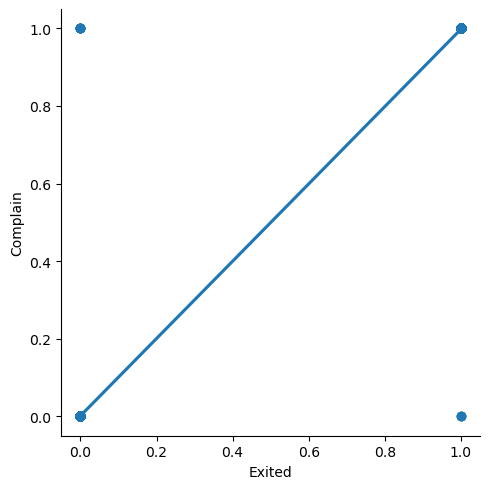

In [9]:
#create scatterplot between Exited and Complain columns 
sns.lmplot(x = 'Exited', y = 'Complain', data = df)

As can be seen from the scatter plot, the line is a perfect one-to-one slope indicating a strong correaltion.  Thus I will use these two variables with Exited being the dependant variable and Complain being the independent variable.

**4. State your hypothesis in a markdown cell within your Jupyter notebook.**

HYPOTHESIS: A CUSTOMER WILL LEAVE THE BANK IF THEY COMPLAIN.

**5. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.**

In [10]:
#reshape variables 
X = df['Complain'].values.reshape(-1, 1)
y = df['Exited'].values.reshape(-1, 1)

In [11]:
#check X
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [12]:
#check y
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

**6. Split the data into two sets: a training set and a test set.**

In [13]:
#split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**7. Run a linear regression on the data. First, fit the model you created to the training set. Then, create a prediction for y on the test set.**

In [14]:
#create regression object
regression = LinearRegression()

In [15]:
#fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
#predict the values of y using X.
y_predicted = regression.predict(X_test)

**8. Create a plot that shows the regression line on the test set.**

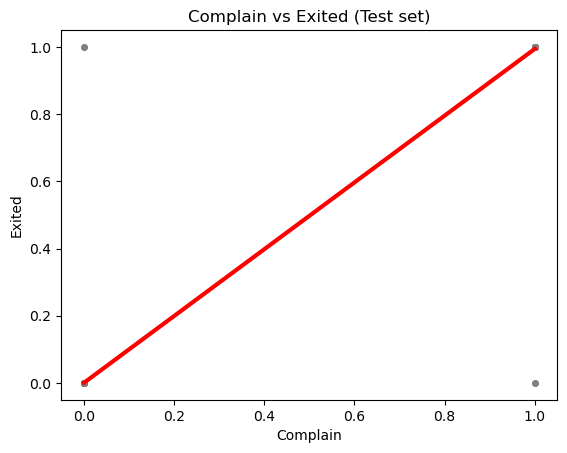

In [20]:
#visualizing the training set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Complain vs Exited (Test set)')
plot_test.xlabel('Complain')
plot_test.ylabel('Exited')
plot_test.show()

**9. Write your own interpretation of how well the line appears to fit the data in a markdown cell.**

The line appears to fit the data perfectly, at a one-to-one ratio.  This indicates that everyone who complained, exited the bank.  There does seem to be some outliers but because the line has such a perfect one-to-one ratio, the outliers are very few. 

**10.Check the model performance statistics—MSE and R2 score.**

In [21]:
#create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) #this is the mean squared error
r2 = r2_score(y_test, y_predicted) #this is the R2 score. 

In [22]:
#print the slope, mean squared error, and r2 score
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.99401557]]
Mean squared error:  0.0013320182039997762
R2 score:  0.9918950482342169


The slope indicates a positive relationship so as X increases so does y.  The MSE is very small which tells us the regression line is very close to the set of points.  The R2 score is close to one so it means we have a good fit at explaining the variance of the data. 

**11. Compare the predicted y values with the actual y values in a dataframe.**

In [24]:
#create a df comparing actual y values to predicted ones
df_predict = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_predict.head(30)

,Actual,Predicted
0,0,0.000359
1,1,0.994374
2,0,0.000359
3,0,0.000359
4,0,0.000359
5,1,0.994374
6,0,0.000359
7,0,0.000359
8,1,0.994374
9,1,0.994374


As can be seen from the above table, the y predict values are very close to the actual values.  

**12. Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.**

The regression model worked very well at predicting customer churn.  I can say with certainty now that everyone who complains leaves the bank.  This could mean that the bank needs to work on their customer service to help with customer retention.  Perhaps, the next steps are to determine who complains the most and perhaps if possible why are they complaining, does it have something to do with credit cards, perhaps?
Some biases in the data is to consider how were the complaints and exited factors measured by humans and/or machines.  Regardless of which, both cases would be susceptible to bias, one must ask the question how was it determined that somebody complained? Was it based on pre-determined factors? Were these factors strictly adhered to? The same for exited, what were the factors that determined if somebody exited? Was it based on pre-determined factors? Were these factors strictly adhered to?